## Mock Misconfiguration Input



In [8]:
# --- Test Case 1: Public Owner Role (IAM Misconfiguration) ---
security_policy_1 = """
{
  "bindings": [
    {
      "role": "roles/owner",
      "members": [
        "user:admin@example.com",
        "allUsers"
      ]
    }
  ]
}
"""
# --- Test Case 2: Exposed Firewall Port with allUsers Access ---
security_policy_2 = """
{
  "bindings": [
    {
      "role": "roles/compute.admin",
      "members": [
        "user:dev@example.com",
        "allUsers"
      ]
    }
  ],
  "firewall": {
    "allowed": ["tcp:22"],
    "sourceRanges": ["0.0.0.0/0"]
  }
}
"""
# --- Test Case 3: Low-Risk Redundant Permission ---
security_policy_3 = """
{
  "bindings": [
    {
      "role": "roles/storage.viewer",
      "members": [
        "serviceAccount:read-logs@example.iam.gserviceaccount.com"
      ]
    },
    {
      "role": "roles/storage.viewer",
      "members": [
        "serviceAccount:read-logs@example.iam.gserviceaccount.com"
      ]
    }
  ]
}
"""
print("Sample Security Policy Input (Test Case 1):")
print(security_policy_1)
print("Sample Security Policy Input (Test Case 2):")
print(security_policy_2)
print("Sample Security Policy Input (Test Case 3):")
print(security_policy_3)

Sample Security Policy Input (Test Case 1):

{
  "bindings": [
    {
      "role": "roles/owner",
      "members": [
        "user:admin@example.com",
        "allUsers"
      ]
    }
  ]
}

Sample Security Policy Input (Test Case 2):

{
  "bindings": [
    {
      "role": "roles/compute.admin",
      "members": [
        "user:dev@example.com",
        "allUsers"
      ]
    }
  ],
  "firewall": {
    "allowed": ["tcp:22"],
    "sourceRanges": ["0.0.0.0/0"]
  }
}

Sample Security Policy Input (Test Case 3):

{
  "bindings": [
    {
      "role": "roles/storage.viewer",
      "members": [
        "serviceAccount:read-logs@example.iam.gserviceaccount.com"
      ]
    },
    {
      "role": "roles/storage.viewer",
      "members": [
        "serviceAccount:read-logs@example.iam.gserviceaccount.com"
      ]
    }
  ]
}



## Simulate Agent Reasoning




In [9]:
def analyze_policy(policy_text):
    # Simulated prompt + reasoning logic
    if "allUsers" in policy_text:
        return {
            "risk": "High",
            "issue": "Overly permissive access granted to allUsers (public access).",
            "recommendation": "Remove 'allUsers' and use IAM groups or specific roles with least privilege."
        }
    else:
        return {
            "risk": "Low",
            "issue": "No major public exposure detected.",
            "recommendation": "Review policies periodically for changes."
        }

# Run agent analysis for all IAM policy test cases
security_policies = [security_policy_1, security_policy_2, security_policy_3]
results = []

for idx, policy in enumerate(security_policies, start=1):
    result = analyze_policy(policy)
    results.append(result)
    print(f"\n{idx}. Agent Risk Analysis (Test Case {idx}):")
    print(result)



1. Agent Risk Analysis (Test Case 1):
{'risk': 'High', 'issue': 'Overly permissive access granted to allUsers (public access).', 'recommendation': "Remove 'allUsers' and use IAM groups or specific roles with least privilege."}

2. Agent Risk Analysis (Test Case 2):
{'risk': 'High', 'issue': 'Overly permissive access granted to allUsers (public access).', 'recommendation': "Remove 'allUsers' and use IAM groups or specific roles with least privilege."}

3. Agent Risk Analysis (Test Case 3):
{'risk': 'Low', 'issue': 'No major public exposure detected.', 'recommendation': 'Review policies periodically for changes.'}


## Define Severity Scoring Function

In [3]:
# Basic risk scoring based on keywords in the issue text
def classify_risk(issue_text):
    issue_text = issue_text.lower()
    if any(keyword in issue_text for keyword in ["allusers", "public"]):
        return {"severity": "High", "score": 9}
    if any(keyword in issue_text for keyword in ["broad access", "admin"]):
        return {"severity": "Medium", "score": 6}
    return {"severity": "Low", "score": 3}

## Search Grounding Integration: SerpAPI






In [12]:
!pip install requests


# Integrate SerpAPI for Real-Time Grounding
import requests


# Load secret securely from Kaggle Secrets

SERPAPI_API_KEY = "1e9ffaa4d1a024de2e513ec86a76101725b565f04b0d95954c3a32dd20e609e5"

def serpapi_grounding(query, num_results=3):
    url = "https://serpapi.com/search.json"
    params = {
        "q": query,
        "engine": "google",
        "api_key": SERPAPI_API_KEY,
        "num": num_results
    }
    
    response = requests.get(url, params=params)
    if response.status_code == 200:
        results = response.json().get("organic_results", [])
        return [res["snippet"] for res in results]
    else:
        return [f"Error fetching results: {response.text}"]

# Example real-time query (after adding your SerpAPI key)

## Invoke Agent Function: Apply Risk Classification & Aggregate Results




In [13]:
# Ensure result_1, result_2, result_3 are defined
result_1 = analyze_policy(security_policy_1)
result_2 = analyze_policy(security_policy_2)
result_3 = analyze_policy(security_policy_3)

# Apply severity classification and merge for all test cases
results = [result_1, result_2, result_3]
enhanced_results = []

for i, r in enumerate(results, start=1):
    classification = classify_risk(r["issue"])
    enhanced = {
        **r,
        **classification
    }
    enhanced_results.append(enhanced)
    print(f"\n Enriched Agent Output with Severity Score (Test Case {i}):")
    print(enhanced)



 Enriched Agent Output with Severity Score (Test Case 1):
{'risk': 'High', 'issue': 'Overly permissive access granted to allUsers (public access).', 'recommendation': "Remove 'allUsers' and use IAM groups or specific roles with least privilege.", 'severity': 'High', 'score': 9}

 Enriched Agent Output with Severity Score (Test Case 2):
{'risk': 'High', 'issue': 'Overly permissive access granted to allUsers (public access).', 'recommendation': "Remove 'allUsers' and use IAM groups or specific roles with least privilege.", 'severity': 'High', 'score': 9}

 Enriched Agent Output with Severity Score (Test Case 3):
{'risk': 'Low', 'issue': 'No major public exposure detected.', 'recommendation': 'Review policies periodically for changes.', 'severity': 'High', 'score': 9}


### Search Grounding – Real-Time Remediation Tips (Test Cases 1–3)



In [14]:
# Generate Final Security Misconfiguration Report
def generate_security_report(data, grounding_tips):
    lines = [
        f"Detected Issue:\n{data['issue']}\n",
        f"Risk Level:\n{data['severity']} (Severity: {data['severity']}, Score: {data['score']})\n",
        f"Recommendation:\n{data['recommendation']}\n",
        "Real-Time Search-Based Tips:\n"
    ] + [f"* Tip {i+1}: {tip}" for i, tip in enumerate(grounding_tips)]

    return "\n".join(lines)

search_results = serpapi_grounding(result["issue"])
search_results_2 = serpapi_grounding(result_2["issue"])
search_results_3 = serpapi_grounding(result_3["issue"])

# Generate and display the report

search_results_list = [search_results, search_results_2, search_results_3]


print("\n 1. Security Misconfiguration Report (Test Case 1):")
final_report = generate_security_report(enhanced_results[0], search_results_list[0])
print(final_report)

print("\n 2. Security Misconfiguration Report (Test Case 2):")
final_report_2 = generate_security_report(enhanced_results[1], search_results_list[1])
print(final_report_2)

print("\n 3. Security Misconfiguration Report (Test Case 3):")
final_report_3 = generate_security_report(enhanced_results[2], search_results_list[2])
print(final_report_3)




 1. Security Misconfiguration Report (Test Case 1):
Detected Issue:
Overly permissive access granted to allUsers (public access).

Risk Level:
High (Severity: High, Score: 9)

Recommendation:
Remove 'allUsers' and use IAM groups or specific roles with least privilege.

Real-Time Search-Based Tips:

* Tip 1: No harmful health effects were found in 195345 residents living in the vicinity of the plant who were screened by the end of May 2011.
* Tip 2: The United Nations Scientific Committee on the Effects of Atomic Radiation (UNSCEAR) identifies four major sources of public exposure to natural ...
* Tip 3: The main objective of this publication is to establish guidelines for limiting EMF exposure that will provide protection against known adverse health effects.

 2. Security Misconfiguration Report (Test Case 2):
Detected Issue:
Overly permissive access granted to allUsers (public access).

Risk Level:
High (Severity: High, Score: 9)

Recommendation:
Remove 'allUsers' and use IAM groups

### Visual Summary – Risk Breakdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.4 MB/s eta 0:00:0000:0100:020m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


Matplotlib is building the font cache; this may take a moment.


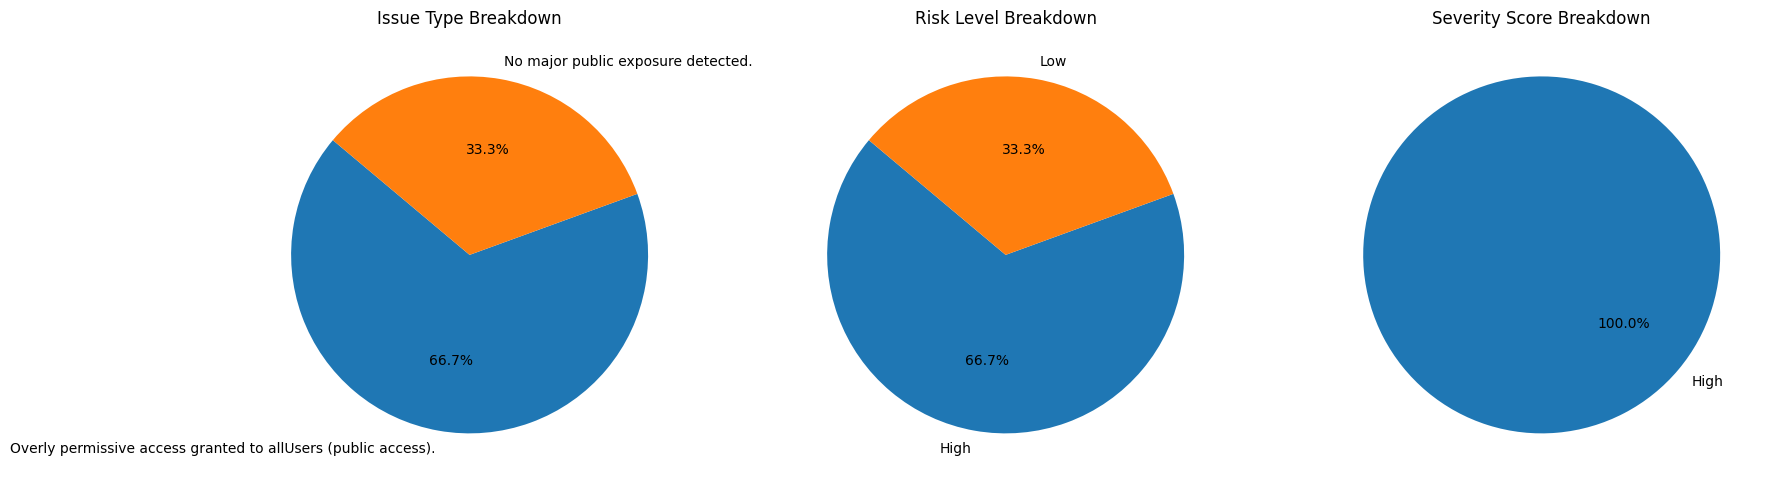

In [17]:
# --- Visual Summary – Risk Breakdown (Auto-generated from agent outputs) ---

# Collect issues from enhanced agent output
!pip install matplotlib
# Create pie chart
import matplotlib.pyplot as plt

# Extract issue types, risk levels, and severity scores
issues = [res["issue"] for res in enhanced_results]
risks = [res["risk"] for res in enhanced_results]
severity = [res["severity"] for res in enhanced_results]

# Count frequency of each
from collections import Counter
issue_counts = Counter(issues)
risk_counts = Counter(risks)
severity_counts = Counter(severity)

# Setup subplots: 3 columns, 1 row
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

labels = list(issue_counts.keys())
counts = list(issue_counts.values())

# Issue Breakdown
axs[0].pie(issue_counts.values(), labels=issue_counts.keys(), autopct="%1.1f%%", startangle=140)
axs[0].set_title("Issue Type Breakdown")

# Risk Level Breakdown
axs[1].pie(risk_counts.values(), labels=risk_counts.keys(), autopct="%1.1f%%", startangle=140)
axs[1].set_title("Risk Level Breakdown")

# Severity Score Breakdown
axs[2].pie(severity_counts.values(), labels=severity_counts.keys(), autopct="%1.1f%%", startangle=140)
axs[2].set_title("Severity Score Breakdown")

plt.tight_layout()
plt.savefig("combined_risk_breakdown.png")
plt.show()

### Final Report Export (PDF + HTML + Markdown)

### Combined Export Block: PDF + HTML + Markdown Report
This block saves the final report (including the pie chart) to three formats: PDF, HTML, and Markdown. These outputs are useful for documentation, review, or integration into dashboards.


In [18]:
# --- Combined Export Block: PDF + HTML + Markdown (All 3 Test Cases) ---

# Install fpdf for PDF generation
!pip install fpdf

from fpdf import FPDF
import re

# Function to clean non-Latin characters (for PDF safety)
def remove_non_latin(text):
    return re.sub(r'[^\x00-\xFF]', '', text)

# PDF Export
def export_pdf(report_text, filename="Security_Misconfig_Report.pdf"):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)

    clean_text = remove_non_latin(report_text)

    for line in clean_text.split("\n"):
        pdf.multi_cell(0, 10, line)

    try:
        pdf.image("combined_risk_breakdown.png", x=10, w=180)
    except Exception as e:
        print(f"[!] Chart image not included in PDF: {e}")

    pdf.output(filename)
    print(f"PDF saved as '{filename}'")

# Markdown Export
def export_markdown(report_text, filename="Security_Misconfig_Report.md"):
    with open(filename, "w") as f:
        f.write("# Security Misconfiguration Report\n\n")
        f.write(report_text)
        f.write("\n\n---\n\n![Risk Breakdown Chart](combined_risk_breakdown.png)\n")
    print(f"Markdown report saved as '{filename}'")

# HTML Export
def export_html(report_text, filename="Security_Misconfig_Report.html"):
    html_template = f"""
    <html>
    <head>
        <title>Security Misconfiguration Report</title>
        <style>
            body {{
                font-family: Arial, sans-serif;
                padding: 20px;
                line-height: 1.6;
            }}
            pre {{
                background-color: #f4f4f4;
                padding: 10px;
                border-radius: 5px;
            }}
        </style>
    </head>
    <body>
        <h1>Security Misconfiguration Report</h1>
        <pre>{report_text}</pre>
        <hr>
        <h2>Risk Breakdown Chart</h2>
        <img src="combined_risk_breakdown.png" alt="Risk Breakdown Chart" width="500">
    </body>
    </html>
    """
    with open(filename, "w") as f:
        f.write(html_template)
    print(f"HTML report saved as '{filename}'")

# Combine all 3 test case reports into one final string
combined_text = "\n\n".join([final_report, final_report_2, final_report_3])

# Run all export formats with combined final report
export_pdf(combined_text)
export_markdown(combined_text)
export_html(combined_text)

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40761 sha256=ee69542b20617f29143d210231652d13823c6fa069a618fd4802ee28a0d8b6ab
  Stored in directory: /Users/hemarubinij/Library/Caches/pip/wheels/44/35/8b/86ce00cec7e4d13c5f189680ae0fa82f919bedc066c2cddae9
Successfully built fpdf
PDF saved as 'Security_Misconfig_Report.pdf'
Markdown report saved as 'Security_Misconfig_Report.md'
HTML report saved as 'Security_Misconfig_Report.html'
